## 准备数据

In [18]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# 随机种子，确保每次运行结果一致
torch.manual_seed(42)

# 生成训练数据
X = torch.randn(100, 2)  # 100 个样本，每个样本 2 个特征
true_w = torch.tensor([2.0, 3.0])  # 假设真实权重
true_b = 4.0  # 偏置项
Y = X @ true_w + true_b + torch.randn(100) * 0.1  # 加入一些噪声

# 打印部分数据
print(X[:5])
print(Y[:5])

tensor([[ 1.9269,  1.4873],
        [ 0.9007, -2.1055],
        [ 0.6784, -1.2345],
        [-0.0431, -1.6047],
        [-0.7521,  1.6487]])
tensor([12.4460, -0.4663,  1.7666, -0.9357,  7.4781])


## 定义线性回归模型

In [19]:
import torch.nn as nn

class linearRegressionModel(nn.Module):
    def __init__(self):
        super(linearRegressionModel, self).__init__()
        self.linear = nn.Linear(2, 1)

    def forward(self, x):
        return self.linear(x)

model = linearRegressionModel()

## 定义损失函数和优化器·

In [20]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

## 训练模型

In [21]:
num_epocher = 1000
for epoch in range(num_epocher):
    model.train()
    optimizer.zero_grad()

    # 前向传播
    Y_pred = model(X)
    Loss = criterion(Y_pred.view(-1), Y)

    # 反向传播
    optimizer.zero_grad()
    Loss.backward()
    optimizer.step()

    # 打印损失
    if (epoch + 1) % 100 == 0:
        print(f'Epoch[{epoch + 1}/1000], Loss:{Loss.item():.4f}')

Epoch[100/1000], Loss:0.4569
Epoch[200/1000], Loss:0.0142
Epoch[300/1000], Loss:0.0082
Epoch[400/1000], Loss:0.0081
Epoch[500/1000], Loss:0.0081
Epoch[600/1000], Loss:0.0081
Epoch[700/1000], Loss:0.0081
Epoch[800/1000], Loss:0.0081
Epoch[900/1000], Loss:0.0081
Epoch[1000/1000], Loss:0.0081


### 将损失展平为一维向量

`.view(-1)` 和 `squeeze()` 的区别


在 PyTorch 中，`.view(-1)` 和 `.squeeze()` 都是用于调整张量形状的方法，但它们的功能和应用场景有显著不同。以下是对两者的详细对比：

#### 1. 功能
- **`.view(-1)`**：将张量展平成一维张量，无论原始张量是什么形状，只要元素总数保持不变。例如，一个形状为 `(3, 4)` 的张量（共 12 个元素），使用 `.view(-1)` 后会变成形状为 `(12,)` 的一维张量。
- **`.squeeze()`**：移除张量中所有大小为 1 的维度，但不会改变其他维度。例如，一个形状为 `(1, 3, 1, 4)` 的张量，使用 `.squeeze()` 后会变成 `(3, 4)`。



#### 2. 返回形状
- **`.view(-1)`**：总是返回一维张量，形状为 `(n,)`，其中 `n` 是张量中元素的总数。
- **`.squeeze()`**：返回的形状取决于原始张量中大小为 1 的维度数量。如果没有大小为 1 的维度，形状保持不变。



#### 3. 适用场景
- **`.view(-1)`**：常用于需要将多维张量转换为一维的情况，例如在全连接层之前或计算损失函数（如交叉熵损失）时需要匹配一维输入。
- **`.squeeze()`**：常用于清理不必要的维度，例如在处理 batch 维度或模型输出时移除大小为 1 的维度。



#### 4. 对张量的要求
- **`.view(-1)`**：适用于任何张量，只要新形状的元素总数与原张量一致即可。
- **`.squeeze()`**：只对大小为 1 的维度起作用，对其他维度无影响。



#### 示例对比
假设有一个张量 `x`，我们来看看两种方法的效果：

- **情况 1：`x` 的形状为 `(1, 3, 1, 4)`**
  - `x.view(-1)`：返回形状为 `(12,)` 的一维张量（因为 1 × 3 × 1 × 4 = 12）。
  - `x.squeeze()`：返回形状为 `(3, 4)` 的张量（移除了所有大小为 1 的维度）。

- **情况 2：`x` 的形状为 `(3, 4)`**
  - `x.view(-1)`：返回形状为 `(12,)` 的一维张量（因为 3 × 4 = 12）。
  - `x.squeeze()`：返回形状为 `(3, 4)` 的张量（因为没有大小为 1 的维度可移除）。



#### 实际应用举例
在深度学习中，例如计算损失时，假设 `Y_pred` 是一个预测张量，形状为 `(batch_size, num_classes)`（如 `(32, 10)`），而目标 `Y` 是一维张量，形状为 `(batch_size,)`（如 `(32,)`）。代码如下：

```python
Loss = criterion(Y_pred.view(-1), Y)
```

这里使用 `.view(-1)` 将 `Y_pred` 从 `(32, 10)` 展平成 `(320,)`，以匹配损失函数的要求。如果使用 `.squeeze()`，则无法达到这个效果，因为 `(32, 10)` 中没有大小为 1 的维度，`.squeeze()` 不会有任何变化。



#### 总结区别
- **功能**：`.view(-1)` 强制展平为 1D，`.squeeze()` 只移除大小为 1 的维度。
- **返回形状**：`.view(-1)` 总是 1D，`.squeeze()` 取决于原始张量。
- **使用场景**：`.view(-1)` 用于需要一维输入的情况，`.squeeze()` 用于简化张量形状。

因此，选择 `.view(-1)` 还是 `.squeeze()` 取决于你的具体需求：如果你需要一维张量，用 `.view(-1)`；如果只是想移除多余的 1 维度，用 `.squeeze()`。

## 评估模型

Predicted weight: [[2.009702  2.9986038]]
Predicted bias: [4.020908]


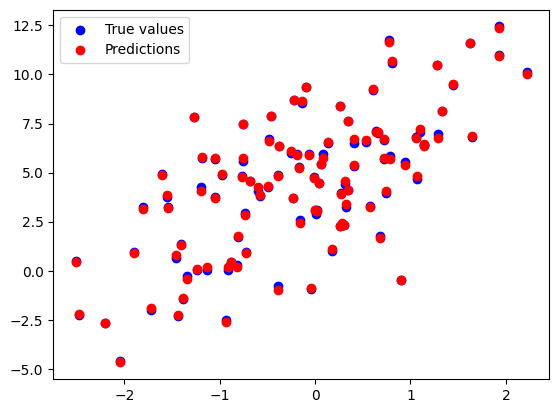

In [22]:
# 查看训练后的权重和偏置
print(f'Predicted weight: {model.linear.weight.data.numpy()}')
print(f'Predicted bias: {model.linear.bias.data.numpy()}')

# 在新数据上做预测
with torch.no_grad():  # 评估时不需要计算梯度
    predictions = model(X)

# 可视化预测与实际值
plt.scatter(X[:, 0], Y, color='blue', label='True values')
plt.scatter(X[:, 0], predictions, color='red', label='Predictions')
plt.legend()
plt.show()